# House Price Prediction

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from datetime import date

import warnings
warnings.filterwarnings('ignore')

C:\Users\Swarnali Sen\AppData\Local\Temp\ipykernel_1396\3732250279.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Reading the dataset

In [2]:
housing = pd.read_csv('train.csv',index_col='Id')

#### Checking housing data

In [3]:
housing.head() 

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
housing.shape

(1460, 80)

In [5]:
housing.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

### Added method to get percentage of null values for the columns having one

In [7]:
def print_null_value_percentage(df):
    null_value_cols = df.columns[round(100*df.isnull().mean(),2) != 0]
    print(round(100*df[null_value_cols].isnull().mean(),2))

In [8]:
print_null_value_percentage(housing)

LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


#### Removing the columns having more the 59% null data

In [9]:
cols_to_drop = housing.columns[ round(100*housing.isnull().mean(),2) > 59.00]
housing.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
print_null_value_percentage(housing)

LotFrontage     17.74
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64


### Added a method to impute the null values with median

In [11]:
def impute_data_with_median(df,col):
    col_median = df[col].median()
    df[col] = df[col].fillna(col_median)
    return df

### Handling 'LotFrontage' data

In [12]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
#Imputing null values with median
housing = impute_data_with_median(housing,'LotFrontage')

### Handling 'MasVnrArea' data

In [14]:
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [15]:
#Imputing null values with median
housing = impute_data_with_median(housing,'MasVnrArea')

### Handling 'Electrical' data

In [16]:
housing['Electrical'].isnull().value_counts()

Electrical
False    1459
True        1
Name: count, dtype: int64

In [17]:
# Dropping the row as it is only 1
housing = housing[~housing['Electrical'].isnull()]

In [18]:
print_null_value_percentage(housing)

BsmtQual         2.54
BsmtCond         2.54
BsmtExposure     2.60
BsmtFinType1     2.54
BsmtFinType2     2.60
FireplaceQu     47.22
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64


### Added method for converting the year column to age w.r.t current year

In [19]:
def convert_yr_to_age(df,col,new_col_name = None):
    current_year = int(date.today().strftime("%Y"))
    df[col] = df[col].add(-current_year).abs()
    if new_col_name:
        df.rename(columns = {col:new_col_name}, inplace = True)
    return df

### Handling 'GarageYrBlt' data i.e. the year which the garage was built

In [20]:
#Converting the year value to age
housing = convert_yr_to_age(housing,'GarageYrBlt','GarageAge')

In [21]:
#Imputing with median value
housing = impute_data_with_median(housing,'GarageAge')

In [22]:
print_null_value_percentage(housing)

BsmtQual         2.54
BsmtCond         2.54
BsmtExposure     2.60
BsmtFinType1     2.54
BsmtFinType2     2.60
FireplaceQu     47.22
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64


### Handling rest of the null values

In [23]:
#As all of the variables are categorical and filling with 'NA'
housing = housing.fillna('NA')

### Handling other year field columns - 'YearBuilt' i.e. year which property was constructed, 'YearRemodAdd' i.e. year which remodelling of property happened, 'YrSold' i.e. year property was sold

In [24]:
housing = convert_yr_to_age(housing,'YearBuilt','PropertyAge')

In [25]:
housing = convert_yr_to_age(housing,'YearRemodAdd','RemodellingAge')

In [26]:
housing = convert_yr_to_age(housing,'YrSold','ProSellingAge')

### Added method to segregate categorical and numeric variables

In [27]:
from pandas.api.types import is_numeric_dtype
def segregate_variables(df):
    cat_vars = []
    num_vars = []
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            num_vars.append(col)
        elif df[col].nunique() <= 25:
            cat_vars.append(col)
    return cat_vars,num_vars

#### Segregating categorical and numercial variables of housing dataset

In [28]:
cat_variables , num_variables = segregate_variables(housing)

#### Checking categorical variables of housing dataset

In [29]:
housing[cat_variables].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

#### Checking numerical variables of housing dataset

In [30]:
housing[num_variables].nunique()

MSSubClass          15
LotFrontage        110
LotArea           1072
OverallQual         10
OverallCond          9
PropertyAge        112
RemodellingAge      61
MasVnrArea         327
BsmtFinSF1         637
BsmtFinSF2         144
BsmtUnfSF          780
TotalBsmtSF        721
1stFlrSF           752
2ndFlrSF           417
LowQualFinSF        24
GrLivArea          861
BsmtFullBath         4
BsmtHalfBath         3
FullBath             4
HalfBath             3
BedroomAbvGr         8
KitchenAbvGr         4
TotRmsAbvGrd        12
Fireplaces           4
GarageAge           97
GarageCars           5
GarageArea         441
WoodDeckSF         274
OpenPorchSF        202
EnclosedPorch      120
3SsnPorch           20
ScreenPorch         76
PoolArea             8
MiscVal             21
MoSold              12
ProSellingAge        5
SalePrice          663
dtype: int64

#### Removing Exteriors and Conditions columns as those will be handled separately
#### Also, MSSubClass is a categorical variable, so mapping to the same

In [31]:
cat_variables.remove('Exterior1st')
cat_variables.remove('Exterior2nd')
cat_variables.remove('Condition1')
cat_variables.remove('Condition2')
cat_variables.append('MSSubClass')
num_variables.remove('MSSubClass')

#### Converting Quality categorical variables using rating map

In [32]:
quality_rating_map_1={
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': -1
}
quality_cat_variables = ['GarageQual','GarageCond','KitchenQual','BsmtQual','BsmtCond','ExterQual','ExterCond','HeatingQC','FireplaceQu']
housing[quality_cat_variables] = housing[quality_cat_variables].replace(quality_rating_map_1)
for col in quality_cat_variables:
    cat_variables.remove(col)

#### Converting Quality categorical variables using rating map for Basement Exposure column

In [33]:
quality_rating_map_2 = {
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'NA': -1
}
housing['BsmtExposure'] = housing['BsmtExposure'].replace(quality_rating_map_2)
cat_variables.remove('BsmtExposure')

#### Converting yes/No Binary variable for Central Air Conditioning column

In [34]:
binary_yes_no_map={
    'N': 0,
    'Y': 1
}
housing['CentralAir'] = housing['CentralAir'].replace(binary_yes_no_map)
cat_variables.remove('CentralAir')

#### Getting dummy variables for all the categorical columns

In [35]:
for col in cat_variables:
    dummy_cols = pd.get_dummies(housing[col],prefix=col, drop_first=True, dtype=int)
    housing = housing.join(dummy_cols)
    housing.drop(col,axis=1,inplace=True)

### Checking Exteriors columns - Exterior1st & Exterior2nd

In [36]:
housing['Exterior1st'].value_counts()

Exterior1st
VinylSd    514
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [37]:
housing['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    503
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [38]:
#There are some typing mistakes in the 'Exterior2nd' column - so fixing it
housing['Exterior2nd']=housing['Exterior2nd'].str.replace('Wd Shng','Wd Sdng')
housing['Exterior2nd']=housing['Exterior2nd'].str.replace('CmentBd','CemntBd')
housing['Exterior2nd']=housing['Exterior2nd'].str.replace('Brk Cmn','BrkComm')

### Added method for getting dummy variables using multiple columns 

In [39]:
def get_dummy_vars(df,cols,dummy_map,dropFirst=False):
    for col in cols:
        for var in df[col]:
            df[dummy_map[var]] = df[col]==var
    if dropFirst:
        cols.append(list(dummy_map.values())[0]) #dropFirst
    df.drop(cols ,axis = 1, inplace=True)
    df = df.replace({True: 1, False: 0})
    return df

#### Creating the dummy_variables_map for Exteriors

In [40]:
exteriors_dummy_map = {
    'AsbShng':'Exterior_AsbShng',
    'AsphShn':'Exterior_AsphShn',
    'BrkComm':'Exterior_BrkComm',
    'BrkFace':'Exterior_BrkFace',
    'CBlock':'Exterior_CBlock',
    'CemntBd':'Exterior_CemntBd',
    'HdBoard':'Exterior_HdBoard',
    'ImStucc':'Exterior_ImStucc',
    'MetalSd':'Exterior_MetalSd',
    'Other':'Exterior_Other',
    'Plywood':'Exterior_Plywood',
    'PreCast':'Exterior_PreCast',
    'Stone':'Exterior_Stone',
    'Stucco':'Exterior_Stucco',
    'VinylSd':'Exterior_VinylSd',
    'Wd Sdng':'Exterior_WdSdng',
    'WdShing':'Exterior_WdShing'
}

#### Getting dummy variables for Exteriors

In [41]:
housing = get_dummy_vars(housing,['Exterior1st','Exterior2nd'],exteriors_dummy_map,True)

#### Creating the dummy_variables_map for Conditions

In [42]:
conditions_dummy_map = {
'Artery': 'Condtions_Artery',
'Feedr': 'Condtions_Feedr',	
'Norm': 'Condtions_Norm',	
'RRNn': 'Condtions_RRNn',
'RRAn': 'Condtions_RRAn',
'PosN': 'Condtions_PosN',
'PosA': 'Condtions_PosA',
'RRNe': 'Condtions_RRNe',
'RRAe': 'Condtions_RRAe'
}

#### Getting dummy variables for Conditions

In [43]:
housing = get_dummy_vars(housing,['Condition1','Condition2'],conditions_dummy_map,True)

### Checking the columns

In [44]:
housing.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'PropertyAge',
       'RemodellingAge', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'Exterior_CBlock', 'Exterior_Other', 'Condtions_Norm',
       'Condtions_Feedr', 'Condtions_PosN', 'Condtions_RRAe', 'Condtions_RRNn',
       'Condtions_RRAn', 'Condtions_PosA', 'Condtions_RRNe'],
      dtype='object', length=205)

### Visualizing data w.r.t SalePrice

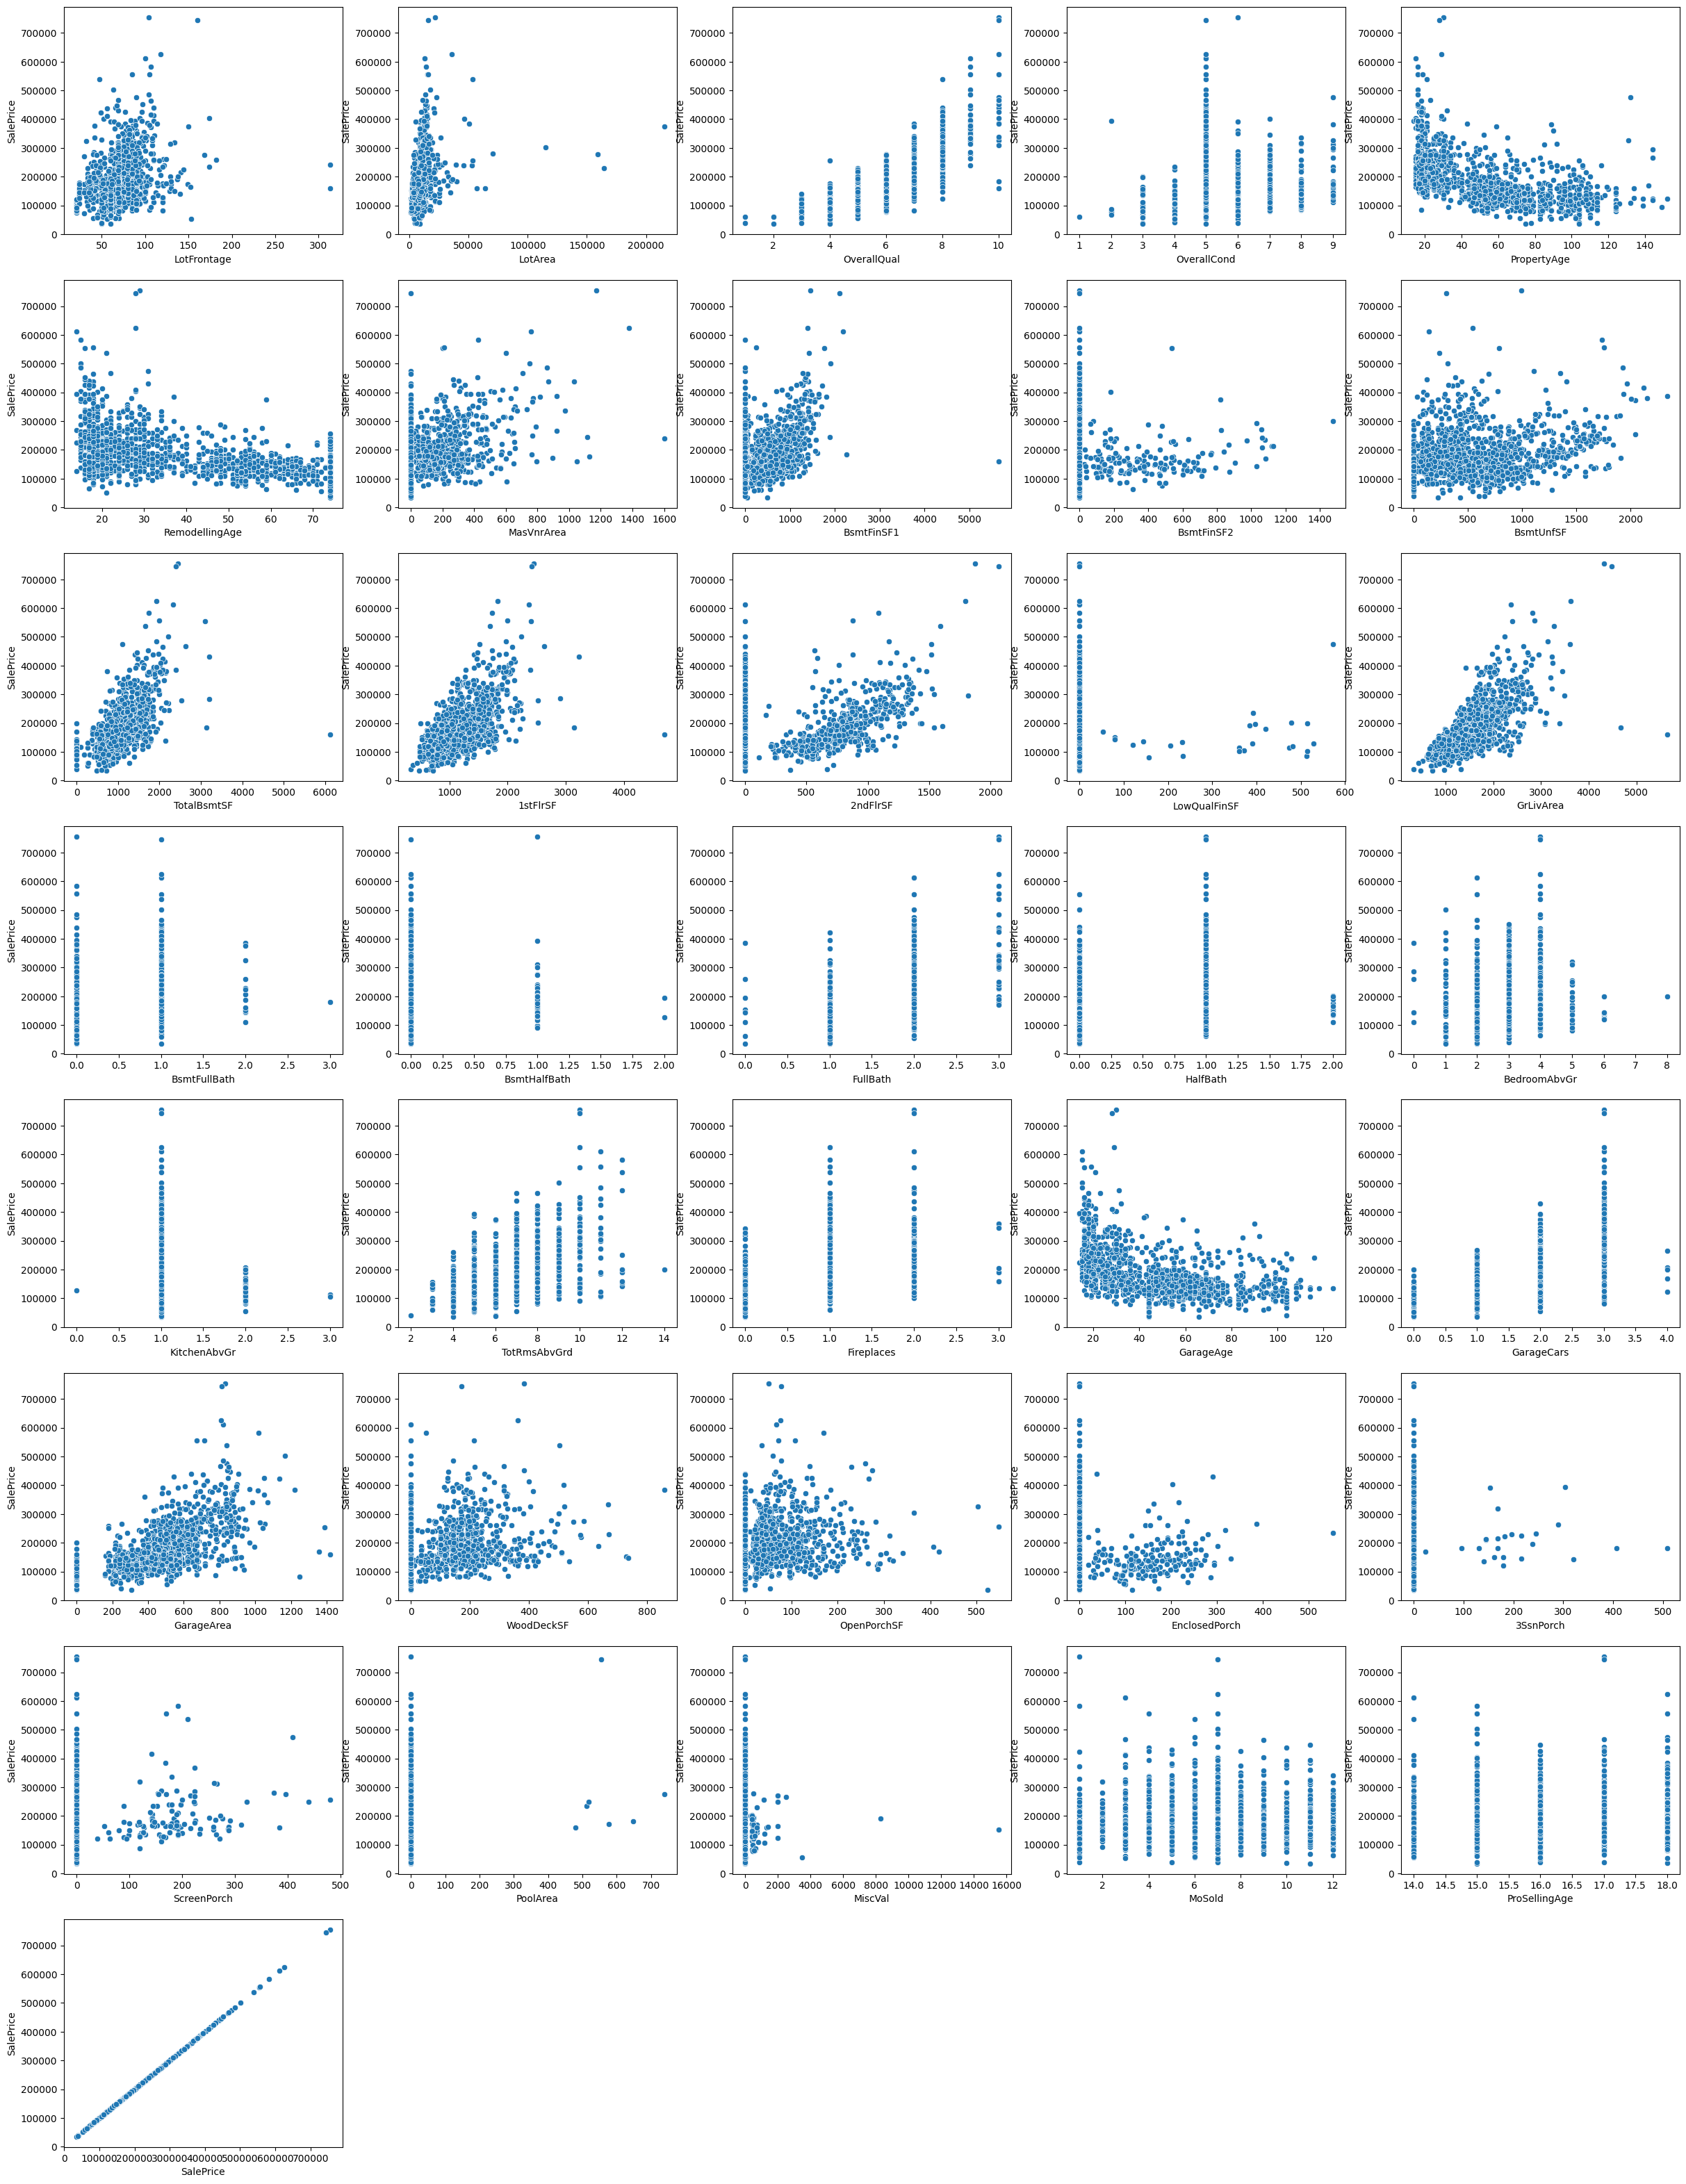

In [45]:
cols=5
rows=len(num_variables)//cols+1
plt.figure(figsize=(cols*6, rows*5))
for i in range(len(num_variables)):
    plt.subplot(rows,cols,i+1)
    sns.scatterplot(x = num_variables[i], y = 'SalePrice', data = housing)
plt.show()

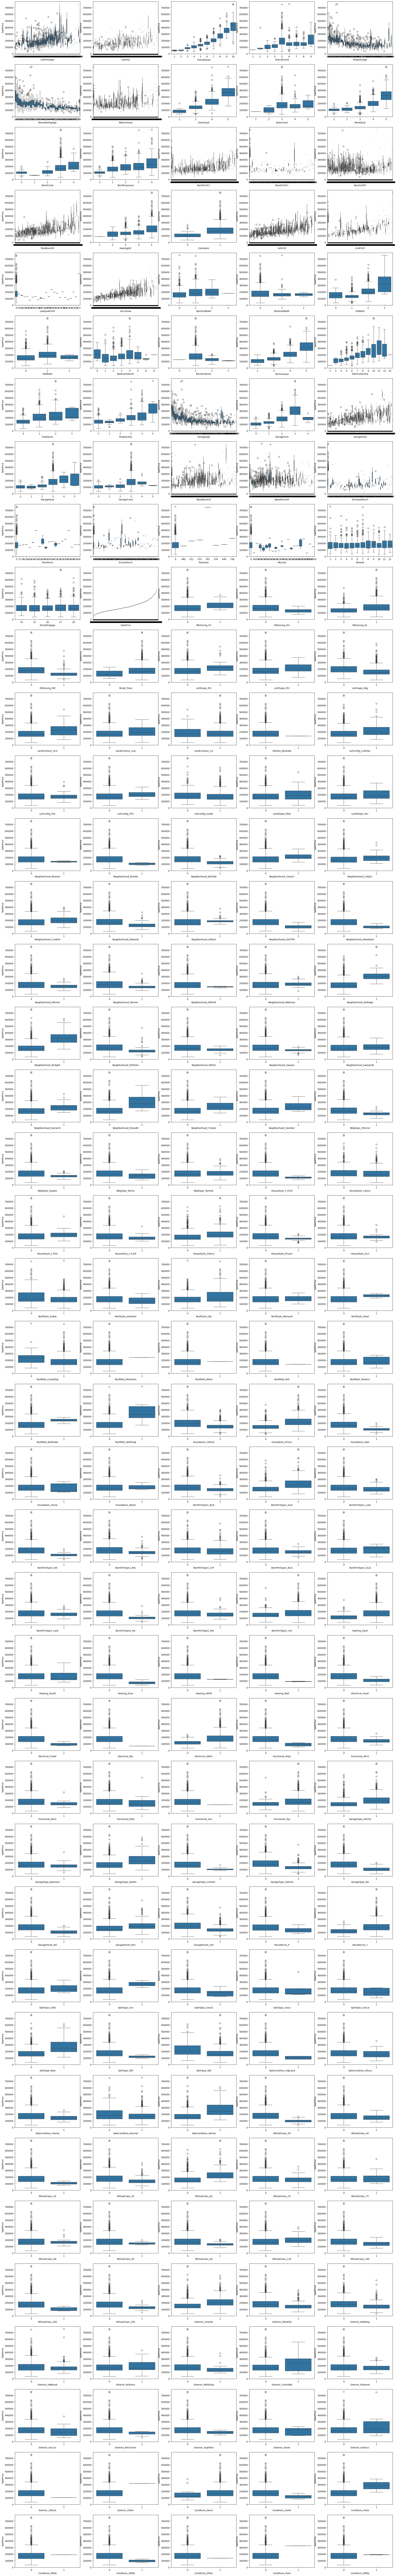

In [46]:
cols=5
rows=len(housing.columns)//cols+1
plt.figure(figsize=(cols*6, rows*5))
for i in range(len(housing.columns)):
    plt.subplot(rows,cols,i+1)
    sns.boxplot(x = housing.columns[i], y = 'SalePrice', data = housing)
plt.show()

In [47]:
plt.figure(figsize=(100,100))
sns.heatmap(housing.corr(), cmap="YlGnBu")
plt.show()

### Checking the variables which are highly correlated with each other

In [48]:
housing['GarageArea']. corr(housing['GarageCars'])

0.8826130266800475

In [49]:
housing['GarageQual']. corr(housing['GarageCond'])

0.9759859927268855

In [50]:
housing['GarageType_NA']. corr(housing['GarageFinish_NA'])

0.9999999999999999

In [51]:
housing['Fireplaces']. corr(housing['FireplaceQu'])

0.8779997936594486

In [52]:
housing['BsmtFinType1_NA']. corr(housing['BsmtFinType2_NA'])

0.9864073609959184

### Removing multi collinearity 

In [53]:
housing.drop(['GarageCars','GarageCond','GarageFinish_NA','FireplaceQu','BsmtFinType2_NA'],axis=1,inplace=True)
num_variables.remove('GarageCars')

## Splitting train & test data

In [54]:
housing_train, housing_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling the numeric variables

In [55]:
scaler = MinMaxScaler()
housing_train[num_variables] = scaler.fit_transform(housing_train[num_variables])
housing_test[num_variables] = scaler.transform(housing_test[num_variables])

## Getting X & y values of train & test data

In [56]:
y_train = housing_train.pop('SalePrice')
X_train = housing_train
y_test = housing_test.pop('SalePrice')
X_test = housing_test

### Defining a method to get model metrics i.e. train_r2, test_r2, train_rss, test_rss, train_mse, test_mse

In [57]:
def prepare_model_metrics(model,X_train,X_test,y_train,y_test):
    metric = [] #train_r2, test_r2, train_rss, test_rss, train_mse, test_mse

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    #train_r2
    metric.append(r2_score(y_train, y_pred_train))
    #test_r2
    metric.append(r2_score(y_test, y_pred_test))
    #train_rss
    metric.append(np.sum(np.square(y_train - y_pred_train)))
    #test_rss
    metric.append(np.sum(np.square(y_test - y_pred_test)))
    #train_mse
    metric.append(mean_squared_error(y_train, y_pred_train)**0.5)
    #test_mse
    metric.append(mean_squared_error(y_test, y_pred_test)**0.5)

    return metric

## Linear Regression

In [58]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Linear Model Metrics

In [59]:
linear_metric = prepare_model_metrics(linear_model,X_train,X_test,y_train,y_test)

### Preparing list of alphas to tune

In [60]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

## Ridge Regression

In [61]:
ridge_model_cv = GridSearchCV(estimator = Ridge(), 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### Printing the best hyperparameter alpha

In [62]:
print(ridge_model_cv.best_params_)

{'alpha': 3.0}


### Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised

In [63]:
ridge_model = Ridge(alpha= ridge_model_cv.best_params_['alpha'])
ridge_model.fit(X_train, y_train)
print(ridge_model.coef_)

[-2.51690666e-03  3.70100901e-02  9.38726150e-02  4.01420509e-02
  2.34229226e-03 -3.46201220e-03  3.90144808e-02  1.13934806e-02
 -4.45235574e-03  1.58430981e-02 -3.95385205e-03  1.09520571e-02
  2.54656461e-02  1.01038400e-02  2.22426251e-03  2.68113002e-02
  2.32384881e-03  4.50388667e-03  6.99981421e-02  8.21119772e-02
  1.60339188e-03  9.08491456e-02  2.87704336e-02  8.11399923e-03
  4.75696203e-02  1.97737171e-02 -1.44470130e-02 -2.29711137e-02
  1.38085091e-02  4.95836085e-02  2.68050961e-02  7.25275071e-03
  5.14025835e-02  6.49887382e-03  1.00381449e-02  2.38977924e-04
 -1.84500963e-03  1.87249846e-02  1.13316227e-02 -6.73523816e-06
  2.86108560e-03 -6.21338752e-03  3.75802151e-03  1.37009627e-02
  2.33393325e-02  1.06810144e-02  7.82118649e-03  7.42547083e-03
  4.05988485e-03 -2.77929007e-02 -1.87036530e-04  2.80058278e-02
  2.27356507e-02  1.69058522e-02 -1.30531966e-02  1.40559285e-02
 -1.68188433e-02 -2.18205981e-02 -1.41150318e-03 -2.28428866e-03
  1.17302474e-02 -2.39299

In [64]:
ridge_metric = prepare_model_metrics(ridge_model,X_train,X_test,y_train,y_test)

## Lasso Regression

In [65]:
lasso_model_cv = GridSearchCV(estimator = Lasso(), 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### Printing the best hyperparameter alpha

In [66]:
print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


### Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

In [67]:
lasso_model = Lasso(alpha=lasso_model_cv.best_params_['alpha'])
lasso_model.fit(X_train, y_train) 
lasso_model.coef_

array([-0.00000000e+00,  3.81746558e-02,  1.22237375e-01,  4.53148945e-02,
       -0.00000000e+00, -7.72209532e-04,  3.58742303e-02,  9.23543972e-03,
       -3.24849054e-03,  1.35261460e-02, -1.30019705e-03,  1.14076959e-02,
        0.00000000e+00,  0.00000000e+00, -3.94800318e-03,  0.00000000e+00,
        2.36837697e-03,  3.17023100e-04,  0.00000000e+00,  3.12968851e-02,
       -3.92426527e-03,  3.02907697e-01,  3.00767053e-02,  4.27462478e-03,
        3.42920197e-02,  1.40673711e-02, -1.53801453e-02, -2.70220387e-02,
        1.24284217e-02,  1.87965160e-02,  2.03799171e-02,  0.00000000e+00,
        4.76289511e-02,  6.49508002e-04,  4.71900331e-04, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  5.69360742e-03, -0.00000000e+00,
        0.00000000e+00, -4.49757725e-03,  9.49663241e-04,  3.19330103e-03,
        3.98574171e-03,  3.59075739e-03, -0.00000000e+00,  0.00000000e+00,
        1.19716477e-03, -2.60644425e-02,  0.00000000e+00,  2.63838206e-02,
        2.02352398e-02,  

In [68]:
lasso_metric = prepare_model_metrics(lasso_model,X_train,X_test,y_train,y_test)

## Metric table for all the models

In [69]:
table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': linear_metric,
        'Ridge Regression': ridge_metric,
        'Lasso Regression': lasso_metric
        }
all_model_metrics = pd.DataFrame(table ,columns = ['Metric', 'Linear Regression','Ridge Regression','Lasso Regression'] )
all_model_metrics

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.218519e-01          0.878474          0.879496
1   R2 Score (Test)      -3.917524e+20          0.875437          0.877356
2       RSS (Train)       1.021500e+00          1.588510          1.575148
3        RSS (Test)       1.831386e+21          0.582313          0.573343
4       MSE (Train)       3.163052e-02          0.039444          0.039278
5        MSE (Test)       2.044809e+09          0.036462          0.036180

## Observing the changes in the coefficients after regularization

In [70]:
X_housing = housing
X_housing.pop('SalePrice')
betas = pd.DataFrame(index= X_housing.columns)
betas.rows = X_housing.columns
betas['Linear'] = linear_model.coef_
betas['Ridge'] = ridge_model.coef_
betas['Lasso'] = lasso_model.coef_

In [71]:
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Lasso'],ascending=False,inplace=True)
betas.head(10)

Linear     Ridge     Lasso
GrLivArea            -1.078498e+11  0.090849  0.302908
RoofMatl_WdShngl      1.155899e+00  0.087676  0.135551
OverallQual           7.962588e-02  0.093873  0.122237
Neighborhood_NoRidge  5.174828e-02  0.068992  0.077364
Neighborhood_NridgHt  5.992889e-02  0.059201  0.069933
BsmtFinType1_NA       8.917999e-02  0.036961  0.049169
GarageArea            5.367887e-02  0.051403  0.047629
OverallCond           6.585189e-02  0.040142  0.045315
LotArea               1.556827e-01  0.037010  0.038175
RoofMatl_CompShg      1.064352e+00  0.026288  0.037370

## Doubling the alpha values and getting model metrics

In [72]:
ridge_model_2 = Ridge(alpha=ridge_model_cv.best_params_['alpha']*2)
ridge_model_2.fit(X_train, y_train)
ridge_metric_2 = prepare_model_metrics(ridge_model_2,X_train,X_test,y_train,y_test)

lasso_model_2 = Lasso(alpha=lasso_model_cv.best_params_['alpha']*2)
lasso_model_2.fit(X_train, y_train) 
lasso_metric_2 = prepare_model_metrics(lasso_model_2,X_train,X_test,y_train,y_test)

table_2 = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': ridge_metric_2,
        'Lasso Regression': lasso_metric_2
        }
all_model_metrics_2 = pd.DataFrame(table_2 ,columns = ['Metric','Ridge Regression','Lasso Regression'] )
all_model_metrics_2

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.868711          0.867163
1   R2 Score (Test)          0.872111          0.870717
2       RSS (Train)          1.716118          1.736352
3        RSS (Test)          0.597861          0.604381
4       MSE (Train)          0.040998          0.041239
5        MSE (Test)          0.036946          0.037147

In [73]:
betas_2 = pd.DataFrame(index= X_housing.columns)
betas_2.rows = X_housing.columns
betas_2['Ridge'] = ridge_model_2.coef_
betas_2['Lasso'] = lasso_model_2.coef_

betas_2.sort_values(by=['Lasso'],ascending=False,inplace=True)
betas_2.head(5)

Ridge     Lasso
GrLivArea             0.071251  0.270862
OverallQual           0.079899  0.123056
RoofMatl_WdShngl      0.058255  0.097164
Neighborhood_NoRidge  0.065458  0.080754
Neighborhood_NridgHt  0.053299  0.067274